# Sprint04　サポートベクタ―マシン  スクラッチ  

（冒頭にて、入力データ、ScratchSVMClassfierを定義。検算のために、サポートベクタ―数、そのインデックス番号を表示させている）

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import math

In [42]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [53]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, threshold=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
#        self.kernel = kernel カーネルは後から。
        self.threshold = threshold
        self.lmd_ = np.array([])

    def _kernel(self,X1,X2, gamma=1,theta=0, d=1):
        kernel = gamma * (np.dot(X1, X2.T)+theta)**d
        return kernel
        
    def _gradient_descent(self, X, y):
        lmd_ans = self.lmd_ + self.lr*(1 - y * np.sum(self.lmd_ * y * self._kernel(X,X), axis=1))
        lmd_ans = np.where(lmd_ans < 0, 0, lmd_ans)
        return lmd_ans
           
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """        
        # lmd_の初期設定
        self.lmd_ = np.random.rand(1,len(X))*0.00001
        # yのreshape
        y = y.reshape(1,-1)
        # y_val = y_val.reshape(1,-1)
                
        for i in range(self.iter):
            self.lmd_ = self._gradient_descent(X,y)

        self.lmd_ = np.where(self.lmd_ < self.threshold, 0, self.lmd_)
        self.lmd_ = np.ravel(self.lmd_)
        self.n_support_vectors = np.count_nonzero(self.lmd_ > 0)
        self.index_support_vectors = np.nonzero(self.lmd_ )

        for i in self.index_support_vectors:
             self.lam_sv = np.array(self.lmd_[i])
             self.X_sv = np.array(X[i,:])
             self.y_sv = np.array(y[0][i])
        
        print(self.n_support_vectors)
        

    def predict(self, X):
        """
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
            
        judge = np.sum(self.lam_sv*self.y_sv* self._kernel(X, self.X_sv), axis=1)
        judge = np.where(judge<0,-1,judge)
        judge = np.where(judge>=0,1,judge).astype("int8")
        return judge


In [54]:
clf = ScratchSVMClassifier(2000, 0.002, 0.0001)
clf.fit(X,y)

4


In [55]:
clf.index_support_vectors

(array([121, 123, 162, 326], dtype=int64),)

##  【問題１】ラグランジュの未定乗数法による最急降下法

イタレーション回数の検討のため、ScratchSVMClassfier組み込み前の、gradient_descentなどのコードを残している。

In [26]:
## 行列式による導出。イタレーション回数の検討。
lmd_ = np.random.rand(len(X),1)*0.00001
lmd_ = lmd_.reshape(1,500)
y = y.reshape(1,500)

def gradient_descent(X, y, lmd_in):
    lr = 0.002
#   lmd_ = lmd_ + lr*(1- np.dot(lmd_, (np.dot(y, y.T) * np.dot(X, X.T))))
    lmd_ans = lmd_in + lr*(1 - y * np.sum(lmd_in * y * np.dot(X, X.T), axis=1))
    lmd_ans = np.where(lmd_ans < 0, 0, lmd_ans)
    return lmd_ans

temp = np.zeros(20)
for i in range(20):
    iter = i * 100
    for j in range(iter):
        lmd_ = gradient_descent(X,y,lmd_)
    
    n_support_vectors = np.count_nonzero(lmd_ > 0)
    temp[i]=n_support_vectors

temp

array([500., 134.,  67.,  44.,  28.,  16.,  14.,  13.,  12.,  10.,   8.,
         8.,   6.,   6.,   5.,   5.,   5.,   5.,   5.,   4.])

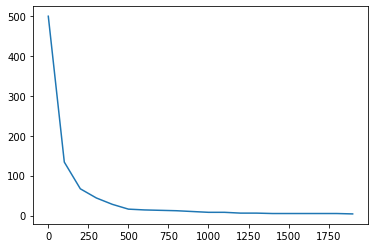

In [27]:
temp_x=np.array([])
temp_x=range(0,2000,100)
plt.plot(temp_x,temp)
plt.show()

In [93]:
### for文Ver
initial_ramda = np.random.normal(0,1,100)
iter = 1000
ramda_ = initial_ramda

def gradient_descent(X, y, ramda_):
    lr = 0.02
    kar = np.dot(X,X.T)
    for i in range(len(X)):
        sum = 0 
        for j in range(len(X)):
            sum = sum + ramda_[j]*y[i]*y[j]*np.dot(X[i][:],X[j][:])
        
        ramda_[i] = ramda_[i] + lr*(1-sum)    
    
    ramda_ = np.where(ramda_ < 0, 0, ramda_)
    return ramda_


for i in range(iter):
    gradient_descent(X,y,ramda_)

ramda_ = np.where(ramda_ < 0, 0, ramda_)
#ramda_ = ramda_.astype("float16)
print(n_support_vectors)
ramda_

#        self.ramda_ = self.ramda_ + lr(1- np.dot(ramda_,(np.dot(y,y.T))*np.dot(X, X.T)

#         print(np.dot(error.T, X))

5000


array([15.59186642, 13.53242012, 13.04056694, 13.58179018, 13.581643  ,
       19.51780424, 16.66980223, 10.94378351,  9.7141188 ,  2.58432111,
        8.28269803,  5.00634547,  4.25446949,  9.16726925, 11.51965623,
       17.86001283, 18.27035561, 11.03376846,  5.0854516 ,  9.72910286,
        0.        , 14.47957626, 11.20359885, 13.43354526,  0.        ,
        0.        ,  9.8799983 ,  2.64519151,  3.49437793,  1.62768518,
        0.        , 10.89811405,  0.        ,  1.04506987,  0.90447611,
        7.87506728,  6.09236246,  0.        ,  4.93166432,  0.        ,
        9.05489494,  9.48962292,  4.99139125, 18.18095674,  0.63304121,
        4.4139291 ,  0.        ,  1.12968393,  0.        ,  1.02069472,
       48.19194667, 16.03237698, 15.76979627,  5.54891885,  0.6798013 ,
        8.71737749,  0.        ,  9.72481186,  8.0431427 ,  0.        ,
        8.2087099 ,  0.        , 18.79329101,  0.        ,  0.        ,
        0.        ,  0.        , 18.69428941,  0.        ,  8.79

## 【問題２】サポートベクターの決定

ScratchSVMClassfier組み込み前のコードを残している。

In [28]:
threshold = 0.0001
lmd_ = np.where(lmd_ < threshold, 0, lmd_)
lmd_ = np.ravel(lmd_)

n_support_vectors = np.count_nonzero(lmd_ > 0)
index_support_vectors = np.nonzero(lmd_ )

for i in index_support_vectors:
    lam_sv = np.array(lmd_[i])
    X_sv = np.array(X[i,:])
    y_sv = np.array(y[0][i])
    
X_sv

array([[-1.02829008,  0.23898594],
       [-0.97854994,  0.34188908],
       [-0.50179779,  0.74466058],
       [ 0.67098941, -0.58384118]])

## 【問題３】　推定

ScratchSVMClassfier組み込み前のコードを残している。

In [29]:
def predict(X):
    judge = np.sum(lam_sv*y_sv*np.dot(X,X_sv.T), axis=1)
    judge = np.where(judge<0,-1,judge)
    judge = np.where(judge>=0,1,judge).astype("int8")
    return judge

## 【問題4】学習と推定

X,yは、冒頭のデータ。
このX,yをtrain_test_splitにて、X_train、y_train、X_test、y_testとしてsklearnへの入力と共通させている。
スクラッチ、sklean 共に、各指標が同一の値となった。

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state = 1)

clf = ScratchSVMClassifier(2000, 0.001, 0.00002)
clf.fit(X_train,y_train,X_test,y_test)
pred = clf.predict(X_test)
print(np.sum(pred==y_test)/len(y_test))

5
1.0


In [57]:
from sklearn.svm import SVC
clf_sk = SVC()
clf_sk.fit(X_train,y_train)
pred_sk = clf_sk.predict(X_test)
print(np.sum(pred_sk == y_test)/len(y_test))

# pred = clf.predict(X_test)
# clf.predict_proba(X_test)
# clf.predict(X_test).T

1.0


C:\Users\hirot\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("## Sklearn SVC ##" )
print("Accuracy:{}".format(accuracy_score(y_test, pred_sk)))
print("precision:{}".format(precision_score(y_test, pred_sk, average=None)))
print("recall:{}".format(recall_score(y_test, pred_sk, average=None)))
print("f1_score:{}\n".format(f1_score(y_test, pred_sk, average=None)))

print("## Sclatch  ##" )
print("Accuracy:{}".format(accuracy_score(y_test, pred)))
print("precision:{}".format(precision_score(y_test, pred, average=None)))
print("recall:{}".format(recall_score(y_test, pred, average=None)))
print("f1_score:{}".format(f1_score(y_test, pred, average=None)))


## Sklearn SVC ##
Accuracy:1.0
precision:[1. 1.]
recall:[1. 1.]
f1_score:[1. 1.]

## Sclatch  ##
Accuracy:1.0
precision:[1. 1.]
recall:[1. 1.]
f1_score:[1. 1.]


## 【問題５】可視化

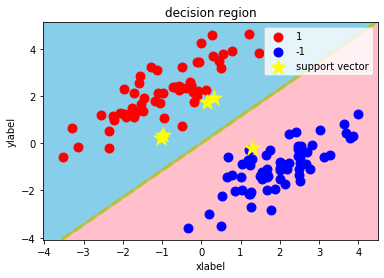

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',
                   target_names=['1', '-1']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2    
      
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], s=250, color="yellow", marker= "*", label = "support vector")

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# 標準化されたＸテストデータ、学習モデルの推定結果、学習済みモデル（フィッティングされたモデル）を入力する。


decision_region(X_test, pred, clf)


# 行列についての勉強（課題とは関係ないですがメモとして残させて下さい。）

In [101]:
X = np.array([[10,5],
              [2,6],
              [3,4],
              [3,4],
              [8,13]])
y = np.array([[1],[0],[0],[1],[1]])

# 内積は転置の前後で形が変わる。5*5 で出したいときと、2*2で出したいときがあるが今回は5*5で出したい。
XX = np.dot(X, X.T)
YY = np.dot(y, y.T)

print(XX*y)
print(XX*y.T)
print(np.dot(XX,YY))
#　こちらは計算不可。print(np.dot(XX,y.T))

print("\n##### np.dotの理解について #####")
print(np.dot(XX,y))
print(np.dot(y.T,XX))
print("すなわち、dot演算の第１引数の行数で結果が出力される")

print("\nアダマール積１")
ZZ = XX*y
print(ZZ)
print("\nアダマール積の縦方向sumと横方向sum")
print(np.sum(ZZ, axis=0))
print(np.sum(ZZ, axis=1))
print("\n通常なら（ｙの転置無し）なら、内積がアダマール積の縦方向sumとなる。")

print("\nアダマール積２")
ZZ = XX*y.T
print(ZZ)
print("\nアダマール積の縦方向sumと横方向sum")
print(np.sum(ZZ, axis=0))
print(np.sum(ZZ, axis=1))
print("\n転置アリなら、内積がアダマール積の横方向sumとなる。")

# np.dot(y.T, y)
# np.sum(X)

[[125  50  50  50 145]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 50  30  25  25  76]
 [145  94  76  76 233]]
[[125   0   0  50 145]
 [ 50   0   0  30  94]
 [ 50   0   0  25  76]
 [ 50   0   0  25  76]
 [145   0   0  76 233]]
[[320   0   0 320 320]
 [174   0   0 174 174]
 [151   0   0 151 151]
 [151   0   0 151 151]
 [454   0   0 454 454]]

##### np.dotの理解について #####
[[320]
 [174]
 [151]
 [151]
 [454]]
[[320 174 151 151 454]]
すなわち、dot演算の第１引数の行数で結果が出力される

アダマール積１
[[125  50  50  50 145]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 50  30  25  25  76]
 [145  94  76  76 233]]

アダマール積の縦方向sumと横方向sum
[320 174 151 151 454]
[420   0   0 206 624]

すなわち内積は、アダマール積の縦方向sumである。

アダマール積２
[[125   0   0  50 145]
 [ 50   0   0  30  94]
 [ 50   0   0  25  76]
 [ 50   0   0  25  76]
 [145   0   0  76 233]]

アダマール積の縦方向sumと横方向sum
[420   0   0 206 624]
[320 174 151 151 454]

すなわち内積は、アダマール積の縦方向sumである。
